In [6]:
# Import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
unemp = pd.read_csv("data/EDA/clean_unemployment.csv")
sal = pd.read_csv("data/EDA/ds_salaries_clean.csv")
books = pd.read_csv("data/EDA/books.csv")
divor = pd.read_csv("data/EDA/divorce.csv")
pln = pd.read_csv("data/EDA/planes.csv")

<h2>Exploratory Data Analysis</h2>
<ul>
	<li><strong>Exploratory data analysis (EDA)</strong> is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.</li>
	<li>The process of reviewing and cleaning data to...
		<ul>
			<li>derive insights</li>
			<li>generate hypotheses</li>
		</ul>
	</li>
</ul>
<h3 dir="ltr"><strong>Key aspects of EDA include:</strong></h3>
<ul>
	<li value="1"><strong><strong>Distribution of Data</strong></strong>: Examining the distribution of data points to understand their range, central tendencies (mean, median), and dispersion (variance, standard deviation).</li>
	<li value="2"><strong><strong>Graphical Representations</strong></strong>: Utilizing charts such as histograms, box plots, scatter plots, and bar charts to visualize relationships within the data and distributions of variables.</li>
	<li value="3"><strong><strong>Outlier Detection</strong></strong>: Identifying unusual values that deviate from other data points. Outliers can influence statistical analyses and might indicate data entry errors or unique cases.</li>
	<li value="4"><strong><strong>Correlation Analysis</strong></strong>: Checking the relationships between variables to understand how they might affect each other. This includes computing correlation coefficients and creating correlation matrices.</li>
	<li value="5"><strong><strong>Handling Missing Values</strong></strong>: Detecting and deciding how to address missing data points, whether by imputation or removal, depending on their impact and the amount of missing data.</li>
	<li value="6"><strong><strong>Summary Statistics:</strong></strong>&nbsp;Calculating key statistics that provide insight into data trends and nuances.</li>
	<li value="7"><strong><strong>Testing Assumptions</strong></strong>: Many statistical tests and models assume the data meet certain conditions (like normality or homoscedasticity). EDA helps verify these assumptions.</li>
</ul>
<p>&nbsp;</p>
<h3>Why Exploratory Data Analysis is Important?</h3>
<p dir="ltr">Exploratory Data Analysis (EDA) is important for several reasons, especially in the context of data science and statistical modeling. Here are some of the key reasons why EDA is a critical step in the data analysis process:</p>
<ol>
	<li value="1"><strong><strong>Understanding Data Structures</strong></strong>: EDA helps in getting familiar with the dataset, understanding the number of features, the type of data in each feature, and the distribution of data points. This understanding is crucial for selecting appropriate analysis or prediction techniques.</li>
	<li value="2"><strong><strong>Identifying Patterns and Relationships</strong></strong>: Through visualizations and statistical summaries, EDA can reveal hidden patterns and intrinsic relationships between variables. These insights can guide further analysis and enable more effective feature engineering and model building.</li>
	<li value="3"><strong><strong>Detecting Anomalies and Outliers</strong></strong>: EDA is essential for identifying errors or unusual data points that may adversely affect the results of your analysis. Detecting these early can prevent costly mistakes in predictive modeling and analysis.</li>
	<li value="4"><strong><strong>Testing Assumptions</strong></strong>: Many statistical models assume that data follow a certain distribution or that variables are independent. EDA involves checking these assumptions. If the assumptions do not hold, the conclusions drawn from the model could be invalid.</li>
	<li value="5"><strong><strong>Informing Feature Selection and Engineering</strong></strong>: Insights gained from EDA can inform which features are most relevant to include in a model and how to transform them (scaling, encoding) to improve model performance.</li>
	<li value="6"><strong><strong>Optimizing Model Design</strong></strong>: By understanding the data&rsquo;s characteristics, analysts can choose appropriate modeling techniques, decide on the complexity of the model, and better tune model parameters.</li>
	<li value="7"><strong><strong>Facilitating Data Cleaning</strong></strong>: EDA helps in spotting missing values and errors in the data, which are critical to address before further analysis to improve data quality and integrity.</li>
	<li value="8"><strong><strong>Enhancing Communication</strong></strong>: Visual and statistical summaries from EDA can make it easier to communicate findings and convince others of the validity of your conclusions, particularly when explaining data-driven insights to stakeholders without technical backgrounds.</li>
</ol>
<p>&nbsp;</p>

In [7]:
# Some basic step look into dataset

# Take a peek with .head()
books.head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016.0,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011.0,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018.0,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017.0,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019.0,Childrens


In [8]:
# Get to know about columns in dataframe i.e. which are numerical, which are non-numerical
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    355 non-null    object 
 1   author  353 non-null    object 
 2   rating  352 non-null    float64
 3   year    355 non-null    float64
 4   genre   355 non-null    object 
dtypes: float64(2), object(3)
memory usage: 14.0+ KB


In [9]:
# Among non-numerical which are categorical like "genre"
books["genre"].value_counts()

genre
Non Fiction    179
Fiction        135
Childrens       41
Name: count, dtype: int64

In [10]:
# For numerical column basics statistics
books.describe()

,rating,year
count,352.000000,355.000000
mean,4.597159,2013.529577
std,0.274755,3.274814
min,2.100000,2009.000000
25%,4.500000,2010.000000
50%,4.600000,2013.000000
75%,4.800000,2016.000000
max,4.900000,2019.000000


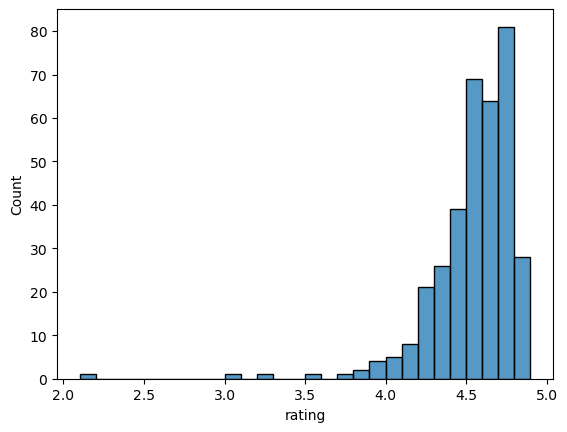

In [11]:
# Visualising a numerical column
sns.histplot(books, x='rating', binwidth=0.1)
plt.show()

<h2>Data validation</h2>
<p>Data validation is a crucial step in Exploratory Data Analysis (EDA) to ensure the accuracy, consistency, and quality of the data before performing any analysis. We want to understand whether data types and ranges are as expected before we progress too far in our analysis.</p>
<p>Here are the key steps involved in data validation during EDA:</p>
<h3>1. <strong>Missing Data Handling</strong></h3>
<ul>
	<li><strong>Identification:</strong> Check for missing values in your dataset using functions like <code>isnull()</code> or <code>isna()</code> in pandas.</li>
	<li><strong>Handling:</strong> Decide on a strategy to handle missing data, such as:
		<ul>
			<li><strong>Dropping:</strong> Remove rows or columns with missing values using <code>dropna()</code>.</li>
			<li><strong>Imputation:</strong> Fill missing values with a specific value (mean, median, mode, etc.) using <code>fillna()</code>.</li>
		</ul>
	</li>
</ul>


In [26]:
#Checking Missing value
books.isna()

,name,author,rating,year,genre
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
350,False,True,False,False,False
351,False,True,False,False,False
352,False,False,True,False,False
353,False,False,True,False,False


In [27]:
# Counting missing value
books.isna().sum()

name      0
author    2
rating    3
year      0
genre     0
dtype: int64

In [30]:
# Checking rows where 'author' value is missing
books[books['author'].isna()]

,name,author,rating,year,genre
350,Demo Book 1,NaN,2.1,2019,Childrens
351,Demo Book 2,NaN,3.1,2014,Fiction


In [31]:
# Remove missing rows with dropna()
# dropna() will return an another DataFrame with NaN entries dropped from it, it will not change original dataframe
# If we want to drop NaN from original dataframe, then we have to re-assigned to original dataframe i.e.
# books = books.dropna()
# or give inplace=True i.e.
# books.dropna(inplace=True)
books.dropna()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens
...,...,...,...,...,...
345,Wild: From Lost to Found on the Pacific Crest ...,Cheryl Strayed,4.4,2012,Non Fiction
346,Winter of the World: Book Two of the Century T...,Ken Follett,4.5,2012,Fiction
347,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,2010,Non Fiction
348,Wonder,R. J. Palacio,4.8,2013,Fiction


In [33]:
# If we want to remove missing values from only 'author' column
books = books.dropna(subset=['author'])

In [34]:
books

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens
...,...,...,...,...,...
348,Wonder,R. J. Palacio,4.8,2013,Fiction
349,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,2019,Childrens
352,Demo Book 3,The Staff of The Late Show with,NaN,2014,Fiction
353,Demo Book 4,Cheryl Strayed,NaN,2014,Fiction


In [35]:
# Filling missing values with fillna()
books = books.fillna(0)

In [36]:
books

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens
...,...,...,...,...,...
348,Wonder,R. J. Palacio,4.8,2013,Fiction
349,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,2019,Childrens
352,Demo Book 3,The Staff of The Late Show with,0.0,2014,Fiction
353,Demo Book 4,Cheryl Strayed,0.0,2014,Fiction


<h3>2. <strong>Data Type Validation</strong></h3>
<ul>
	<li>Ensure that each column in your dataset has the correct data type (e.g., numeric, categorical, datetime).</li>
	<li>Convert data types if necessary using <code>astype()</code> - (<a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html">Documentation</a>)</li>
</ul>

In [12]:
books.dtypes

name       object
author     object
rating    float64
year      float64
genre      object
dtype: object

In [18]:
books['year'] = books['year'].astype(int)

In [19]:
books.dtypes

name       object
author     object
rating    float64
year        int32
genre      object
dtype: object

<h3>3. <strong>Range and Constraint Checking</strong></h3>
<ul>
	<li><strong>Numeric Data:</strong> Check that numeric values fall within expected ranges.</li>
	<li><strong>Categorical Data:</strong> Verify that categorical values are within the expected set of categories.</li>
	<li><strong>Datetime Data:</strong> Ensure dates fall within a valid range and are in a consistent format.</li>
</ul>


In [22]:
# For Numeric Data
# Checking range Numeric Data 'year'
print(f"Minimum year : {books['year'].min()}\nMaximum Year : {books['year'].max()}")

Minimum year : 2009
Maximum Year : 2019


In [52]:
# For Numeric Data
# Checking whether rating values fall inside [0-5.0]
(books['rating'] >= 0) & (books['rating'] <= 5.0)

0      True
1      True
2      True
3      True
4      True
       ... 
348    True
349    True
352    True
353    True
354    True
Name: rating, Length: 353, dtype: bool

In [53]:
# For Numeric Data
# Count how many rating falls outside [0-5]
(~((books['rating'] >= 0) & (books['rating'] <= 5.0))).sum()

0

In [54]:
# For Categorical Data
# Verify that categorical values are within the expected set of categories.
books['genre'].isin(['Non Fiction', 'Fiction', 'Childrens'])

0      True
1      True
2      True
3      True
4      True
       ... 
348    True
349    True
352    True
353    True
354    True
Name: genre, Length: 353, dtype: bool

<h3>4. <strong>Duplicate Data Detection</strong></h3>
<ul>
	<li>Identify duplicate rows using <code>duplicated()</code>.</li>
	<li>Handle duplicates by either removing them using <code>drop_duplicates()</code> or aggregating them.</li>
</ul>
<h3>5. <strong>Outlier Detection</strong></h3>
<ul>
	<li>Identify outliers using statistical methods (e.g., Z-score, IQR) or visualizations (e.g., box plots).</li>
	<li>Decide how to handle outliers&mdash;removal, transformation, or treatment.</li>
</ul>
<h3>6. <strong>Consistency Checks</strong></h3>
<ul>
	<li>Ensure consistency in data formatting (e.g., text casing, spacing, abbreviations).</li>
	<li>Validate consistency across related columns (e.g., total price equals quantity times unit price).</li>
</ul>
<h3>7. <strong>Data Integrity Checks</strong></h3>
<ul>
	<li>Ensure referential integrity (e.g., foreign keys in one table correspond to primary keys in another).</li>
	<li>Validate that sums or counts match expected totals.</li>
</ul>
<h3>8. <strong>Validation Rules</strong></h3>
<ul>
	<li>Implement business-specific rules or constraints (e.g., age should be positive, dates should not be in the future).</li>
	<li>Apply these rules programmatically and check for violations.</li>
</ul>
<h3>9. <strong>Sanity Checks</strong></h3>
<ul>
	<li>Perform general sanity checks to ensure that data makes sense (e.g., no negative ages, reasonable number of outliers).</li>
</ul>
<h3>10. <strong>Visualization for Validation</strong></h3>
<ul>
	<li>Use visualizations like histograms, scatter plots, and box plots to spot inconsistencies, outliers, and other anomalies in the data.</li>
</ul>
<h3>11. <strong>Correlation and Redundancy Checks</strong></h3>
<ul>
	<li>Check for high correlations between features that might indicate redundancy.</li>
	<li>Consider removing one of the correlated features or combining them.</li>
</ul>